In [111]:
# Importing all the dependencies
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

# Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords

#For punctuation
import string
string.punctuation

# stemming
from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sruja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sruja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Reading data into a dataframe
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Data Exploration and Cleaning

In [16]:
# Data Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
# Data cleaning - Dropping useless columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)
df.sample(5)

,message_type,message
4143,ham,That's a shame! Maybe cld meet for few hrs tomo?
5184,ham,I'm in town now so i'll jus take mrt down later.
1707,ham,Was doing my test earlier. I appreciate you. W...
87,ham,Yes I started to send requests to make it but ...
2391,ham,PICK UR FONE UP NOW U DUMB?


In [21]:
# As this is a classification problem we want the “message_type” to be binary classified i.e, 0 or 1 so for this purpose we use label encoder.
encoder =LabelEncoder()
df["message_type"] = encoder.fit_transform(df["message_type"])
df[df["message_type"]==1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [27]:
# Null values and duplicate values
print(df.isnull().sum())
print("Duplicate rows : ",df.duplicated().sum())

message_type    0
message         0
dtype: int64
Duplicate rows :  403


In [28]:
# Dropping duplicate rows
df = df.drop_duplicates()

Exploratory data analysis with Visualization

message_type
0    4516
1     653
Name: count, dtype: int64


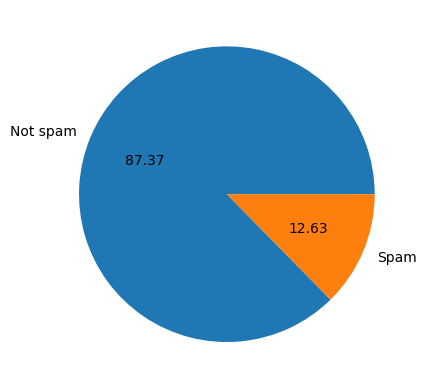

In [33]:
# Data Exploration
print(df['message_type'].value_counts())
plt.pie(df["message_type"].value_counts(), labels=["Not spam", "Spam"], autopct="%0.2f")
plt.show() # the data is imbalanced

# Lets find the number of characters, words and sentences in each row and check if there is any relation to the "message type"

In [35]:
# Counting the number of characters
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
# Counting the number of words
df["message"].apply(lambda x : nltk.word_tokenize(x))
df["num_words"] = df["message"].apply(lambda x : len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words
2578,0,Erm. I thought the contract ran out the4th of ...,54,12
5388,0,NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!,40,12
748,0,Is there a reason we've not spoken this year? ...,101,23
2731,0,Mm feeling sleepy. today itself i shall get th...,53,11
3169,0,"Mah b, I'll pick it up tomorrow",31,9


In [52]:
# Counting the number of sentences
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
5533,0,"Hey chief, can you give me a bell when you get...",113,28,2
3528,1,Xmas & New Years Eve tickets are now on sale f...,157,38,2
162,0,I'm so in love with you. I'm excited each day ...,85,24,3
3726,0,"Aldrine, rakhesh ex RTM here.pls call.urgent.",45,8,1
2890,0,"Yeah there's quite a bit left, I'll swing by t...",67,17,1


In [58]:
# For Ham messages
df[df["message_type"]==0][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
# For Spam messages
df[df["message_type"]==1][["num_characters", "num_words", "num_sentences"]].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

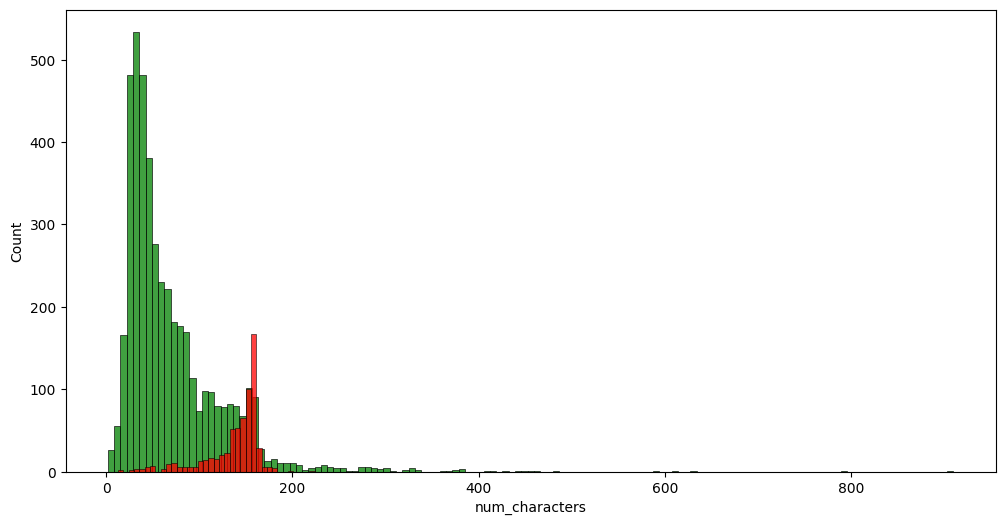

In [61]:
# SPAM MESSAGES ARE LONGER THAN HAM MESSAGES (Mean of word count is more)
plt.figure(figsize=(12,6))
sns.histplot(df[df["message_type"]==0]["num_characters"], color="green")
sns.histplot(df[df["message_type"]==1]["num_characters"], color="red")

<Axes: >

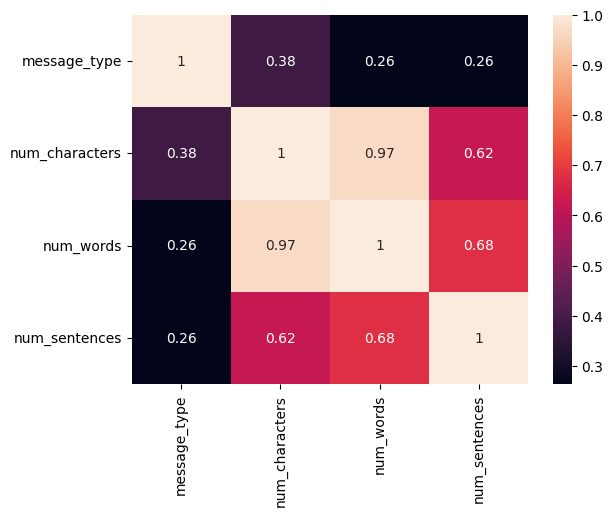

In [69]:
#plotting a heatmap for the correlation
sns.heatmap(df[["message_type", "num_characters", "num_words", "num_sentences"]].corr(), annot=True)

# As we see multicollinearity here, we cannot use all three columns instead we shall use only 
# one and that should be num_characters has it has highest correlation with message_type.

Data Preprocessing
-Lower case
-Tokenization
-Removal of special characters
-Removing stop words and punctuations
-Stemming (Reducing the words to its simplest form)

In [90]:
ps =PorterStemmer()

def text_transform(message):
    # Change to lowercase
    message=message.lower()

    # Tokenizing the words
    message=nltk.word_tokenize(message)
    y=[] 
    for i in message:
        if i.isalnum(): # Checks whether all the characters in a given string are alphanumeric characters
            y.append(i)
        y.clear()
    
    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    #now stemming function  
    for i in message:
        y.append(ps.stem(i))
    
    #return y  --> returns as list
    return " ".join(y)

df['transformed_msg']=df['message'].apply(text_transform)
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
1033,0,"OH MR SHEFFIELD! You wanna play THAT game, oka...",127,36,5,oh mr sheffield wan na play game okay 're boss...
318,1,December only! Had your mobile 11mths+? You ar...,157,30,4,decemb mobil 11mths+ entitl updat latest colou...
5337,0,My birthday is on feb &lt;#&gt; da. .,39,15,2,birthday feb lt gt da
3348,0,Oh is it! Which brand?,22,7,2,oh brand
4356,0,"HELLOGORGEOUS, HOWS U? MY FONE WAS ON CHARGE L...",142,35,3,hellogorg how u fone charg lst nitw wen u texd...


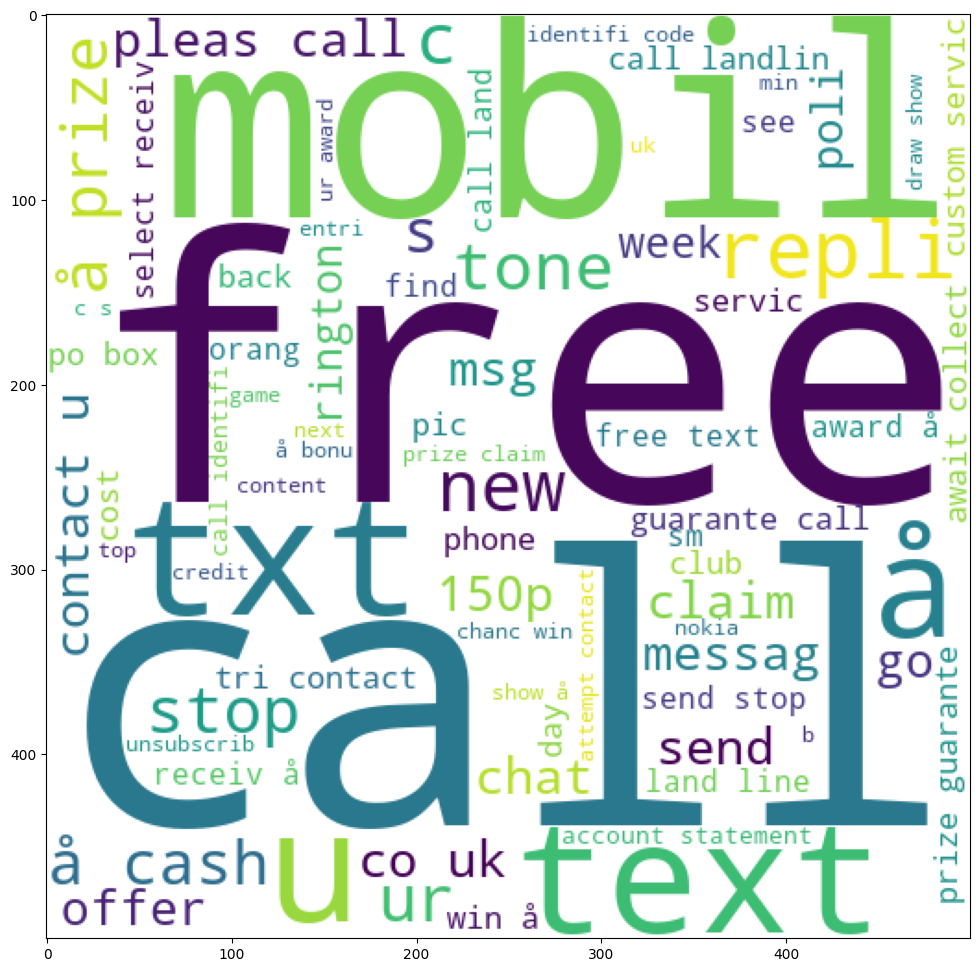

In [100]:
# Word cloud for SPAM
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

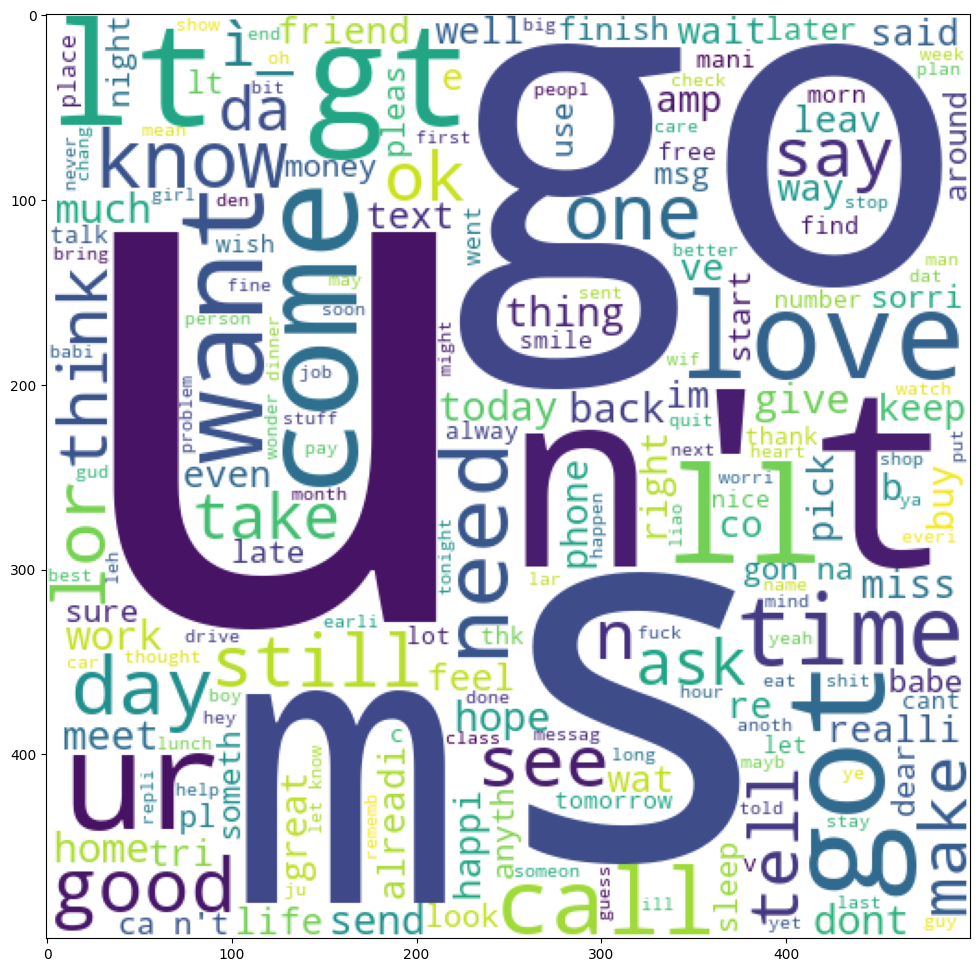

In [101]:
# Word cloud for HAM
ham_wc=wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)

Counter({'call': 320, 'free': 191, '2': 155, 'txt': 141, 'text': 122, 'u': 119, 'ur': 119, 'mobil': 114, 'stop': 104, 'repli': 103, 'claim': 98, '4': 97, 'prize': 82, 'get': 74, 'new': 64, 'servic': 64, 'tone': 63, 'send': 60, "'s": 59, 'urgent': 57, 'nokia': 57, 'contact': 56, 'award': 55, 'phone': 52, 'cash': 51, 'pleas': 51, 'week': 49, 'win': 48, 'c': 45, 'collect': 45, 'min': 45, 'custom': 42, 'messag': 42, 'guarante': 42, 'per': 41, 'chat': 38, 'tri': 37, 'msg': 35, 'draw': 35, 'number': 35, 'cs': 35, 'show': 33, 'today': 33, 'offer': 33, 'line': 33, 'go': 32, 'receiv': 31, 'want': 31, 'latest': 30, 'rington': 30, 'landlin': 30, '150ppm': 29, 'video': 29, '1': 28, 'å£1000': 28, 'voucher': 28, 'code': 27, 'holiday': 27, 'rate': 26, 'network': 26, 'select': 26, '150p': 26, 'date': 26, 'box': 26, 'day': 26, 'everi': 26, 'appli': 24, 'r': 24, 'cost': 24, 'end': 24, 'po': 24, 'orang': 24, 'await': 24, 'camera': 23, 'chanc': 22, 'charg': 22, 'sm': 22, 'live': 22, 'poli': 22, 'attempt':

C:\Users\sruja\AppData\Local\Temp\ipykernel_20840\1408517165.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words_df, x='Count', y='Word', palette='viridis')


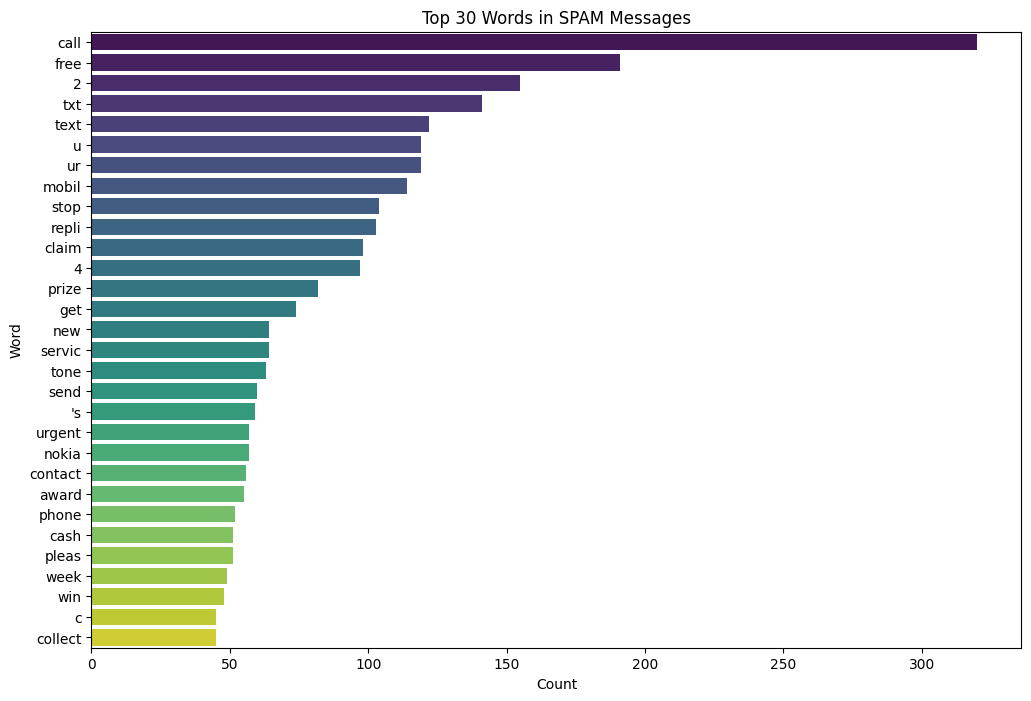

In [110]:
# Getting the top words in SPAM
# Extracting words from the "transformed_msg" column of spam messages
spam_corpus = ' '.join(df[df['message_type'] == 1]['transformed_msg']).split()

# Counting word frequencies
word_count = Counter(spam_corpus)
print(word_count)

# Getting the top 30 words
top_words = word_count.most_common(30)
print(top_words)

# Creating a DataFrame for better visualization
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Count'])

# Plotting the top words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_words_df, x='Count', y='Word', palette='viridis')
plt.title('Top 30 Words in SPAM Messages')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


Naive Bayes Model

In [113]:
# As we know in the Naive Bayes algorithm the input columns should be numerical so we have to convert (VECTORIZE) the column.
# Hence using TF-IDF to vectorize

tfidf= TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['message_type'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [114]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [115]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [117]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8781431334622823
Confusion Matrix of Guassian NB is:  [[790 106]
 [ 20 118]]
Precision score of the Gaussian NB is 0.5267857142857143


In [118]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9748549323017408
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 26 112]]
Precision score of the Multinomial NB is 1.0


In [119]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3)) # This is the model with hoghest Accuracy and Precision

Accuracy score of Bernoulli NB is:  0.988394584139265
Confusion Matrix of Bernoulli NB is:  [[896   0]
 [ 12 126]]
Precision score of the Bernoulli NB is 1.0
